In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("Jamboree_Admission.csv")

In [44]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [3]:
# Dropping the serial column because pandas already has row numbers
df.drop(columns = ["Serial No."], inplace = True)

In [47]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


# Problem Statement:
# Analyze the Jamboreee Dataset to understand the key factors determining the chances of getting admissions in top IVY league colleges. Also we will have to build ML model which will learn patterns in this dataset and make prediction of getting admission given other variables.

## Shape and structure of data

In [4]:
df.shape
# There are 7 independant columns and 1 dependant column with 500 rows.

(500, 8)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


## Checking for null values

In [22]:
df.isnull().sum().sum()
# There are no null values

0

## Statistical Summary

In [23]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [5]:
# Changing the names of the columns
df.columns = ["gre_score",'toefl_score','university_rating', 'sop', 'lor', 'cgpa', 'research', 'chance_of_admit']

## Converting SOP, LOR and Research into categoric variables

In [10]:
df['sop'] = df['sop'].astype('category')
df['lor'] = df['lor'].astype('category')
df['research'] = df['research'].astype('category')

## Univariate Data Analysis

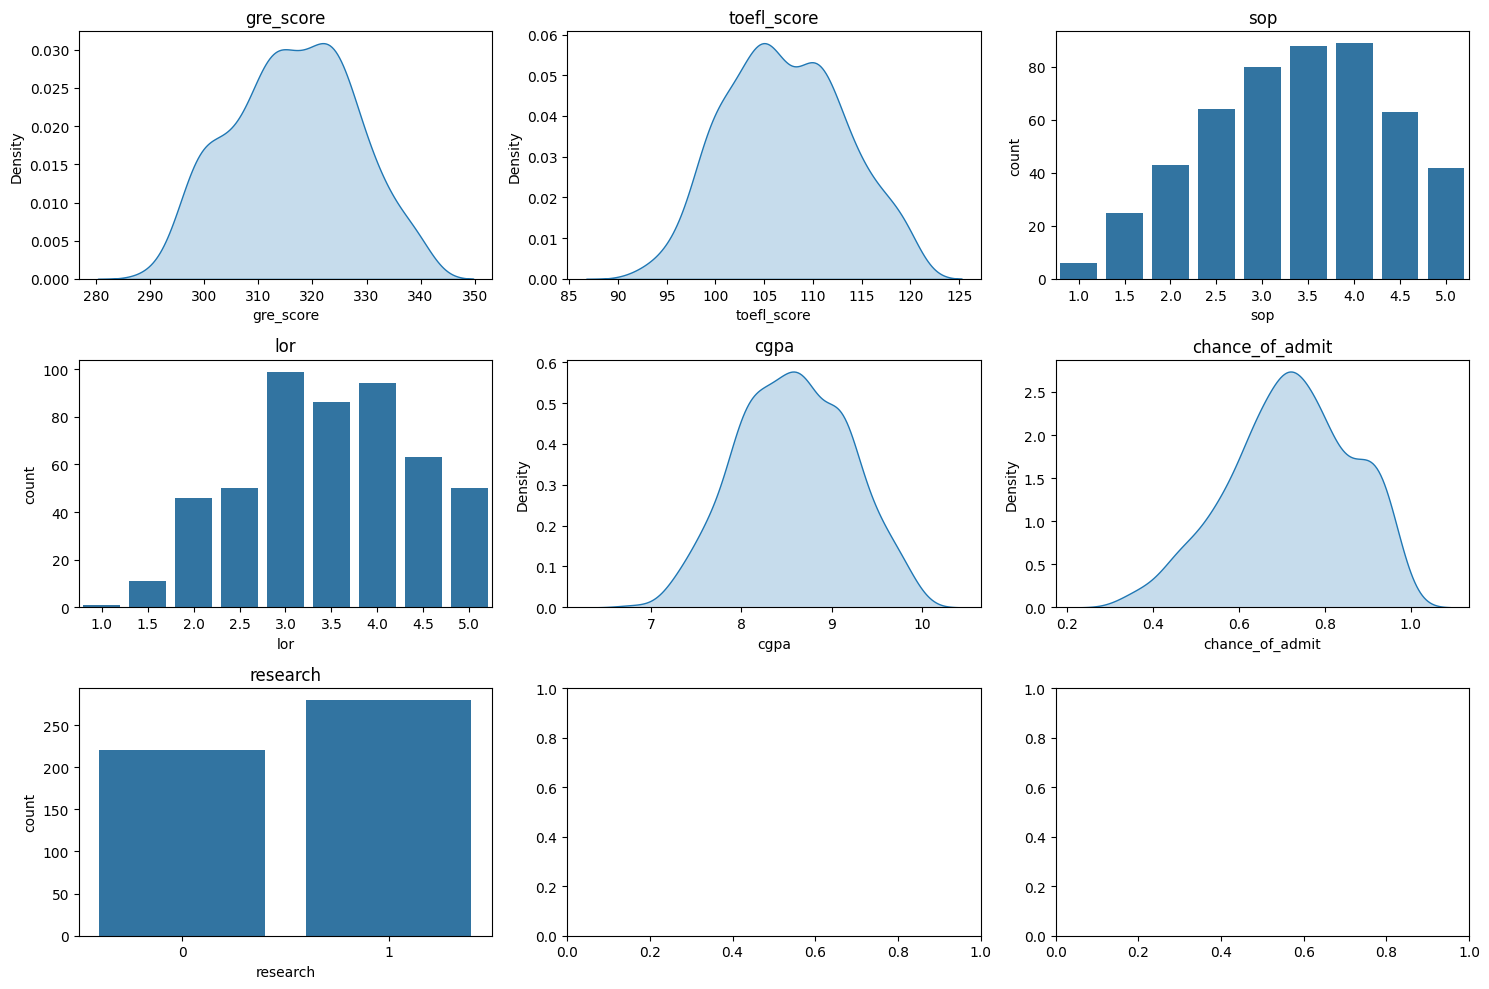

In [7]:
# Set up the matplotlib figure (2x3 grid)
fig, axs = plt.subplots(3, 3, figsize=(15, 10))

# Plot each KDE plot
sns.kdeplot(data=df['gre_score'], ax=axs[0, 0], fill=True)
axs[0, 0].set_title('gre_score')

sns.kdeplot(data=df['toefl_score'], ax=axs[0, 1], fill=True)
axs[0, 1].set_title('toefl_score')

sns.countplot(x=df['sop'], ax=axs[0, 2], fill=True)
axs[0, 2].set_title('sop')

sns.countplot(x=df['lor'], ax=axs[1, 0], fill=True)
axs[1, 0].set_title('lor')

sns.kdeplot(data=df['cgpa'], ax=axs[1, 1], fill=True)
axs[1, 1].set_title('cgpa')

sns.kdeplot(data=df['chance_of_admit'], ax=axs[1, 2], fill=True)
axs[1, 2].set_title('chance_of_admit')

sns.countplot(x=df['research'], ax=axs[2, 0], fill=True)
axs[2, 0].set_title('research')

# Adjust layout
plt.tight_layout()
plt.show()

## Insights based on the univariate charts:
### 1. There are more students who have published research paper than those who have not
### 2. Visually speaking - GRE scores are on average around 320.
### 3. TOEFL score ranges from 90 to 125 and the mode is around 105.
### 4. The most common SOP score is 4, while score 1 and 5 is very less common.
### 5. Most common LOR score is 3 and 4, while score 1 is negligible.
### 6. CGPA mostly lies between 8 to 9, while no one got less than 6.8.
### 7. The median chance of admission is 0.72 which basically says most of the students who are present in Jamboree have high chances of getting through.

## Bivariate Analysis

In [11]:
## let us convert back sop, lor, and research columns into numeric variables
df['sop'] = df['sop'].astype('float64')
df['lor'] = df['lor'].astype('float64')
df['research'] = df['research'].astype('float64')

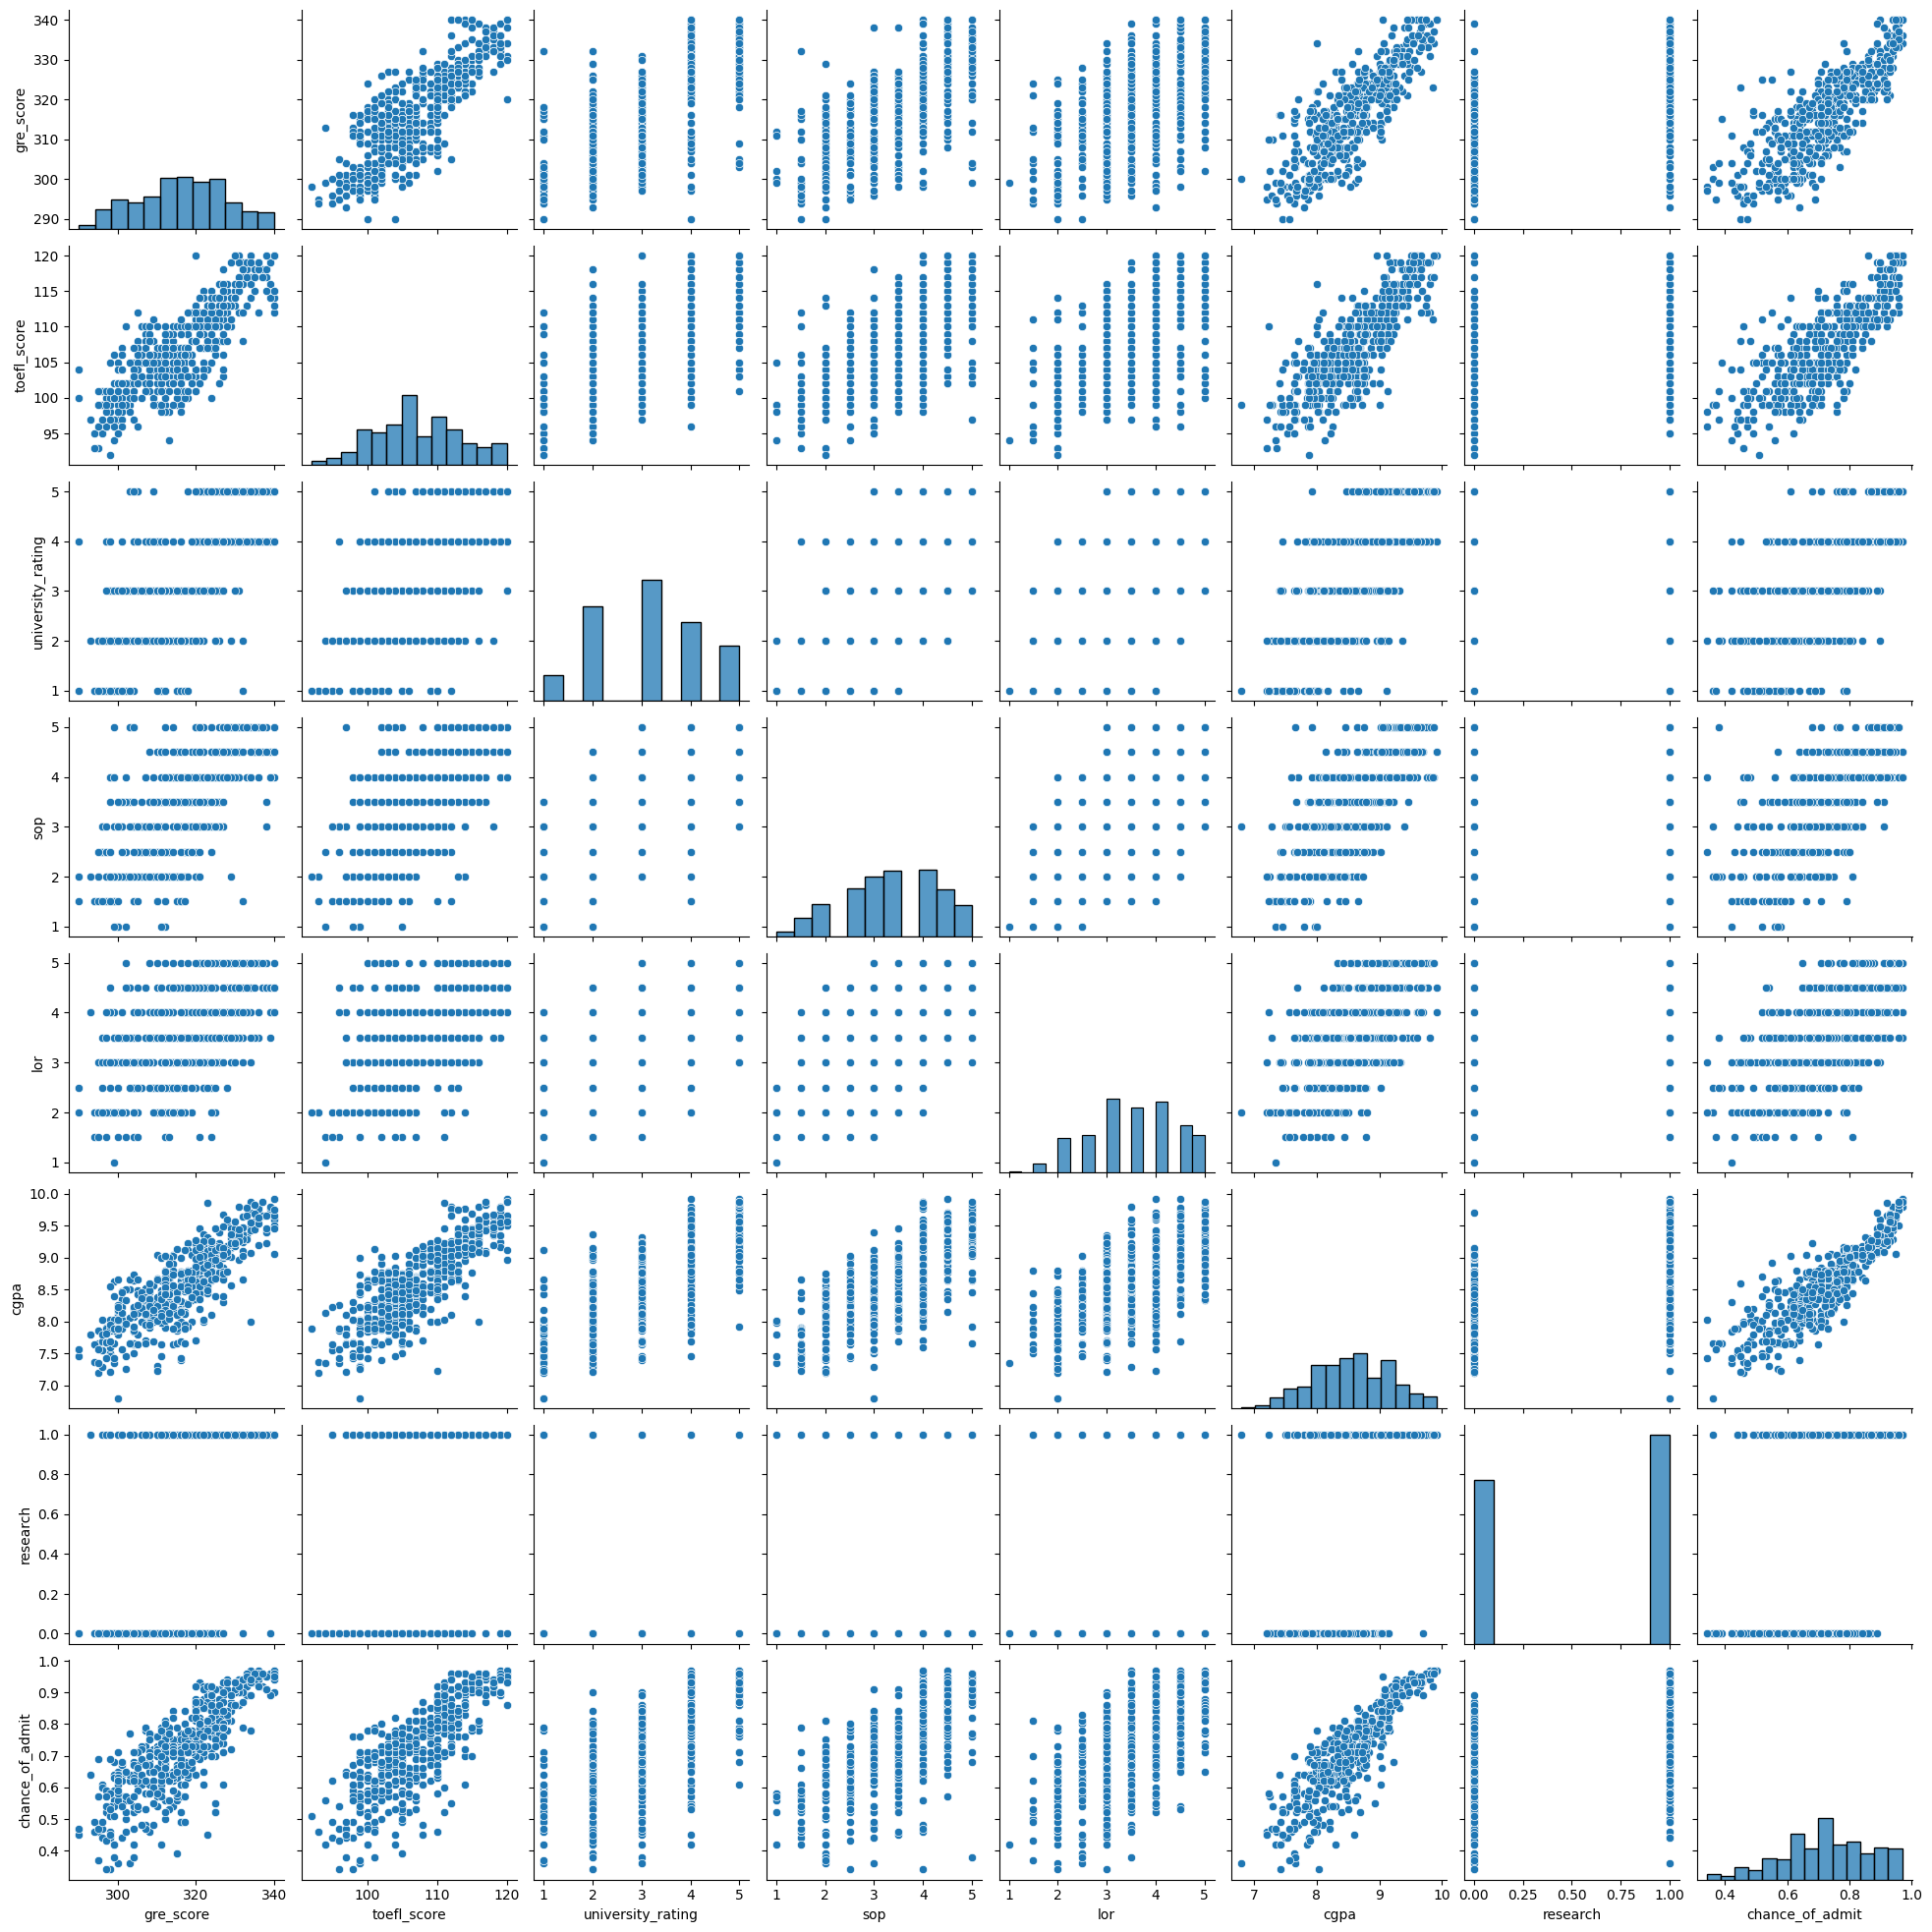

In [55]:
sns.pairplot(df)

<Axes: >

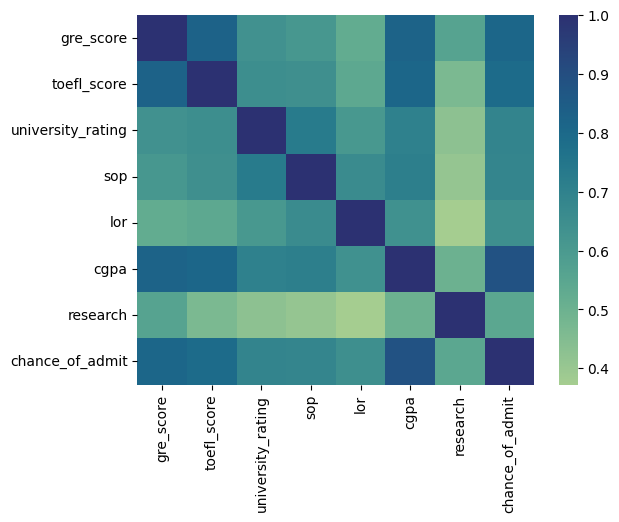

In [63]:
sns.heatmap(df.corr(), cmap = 'crest')

## Insights based on bivariate charts
### 1. GRE score, TOEFL score and CGPA have high correlation with chances of admission.
### 2. LOR and Research have very low correlation with other variables.

## Outlier Treatment

In [12]:
def outlier_func(arr):
    q1 = np.percentile(arr,25)
    q2 = np.percentile(arr,75)
    iqr = 1.5*(q2 - q1)
    low = max(q1 - iqr,0)
    high = q2 + iqr
    outliers = arr[(arr>high) | (arr<low)]
    return outliers

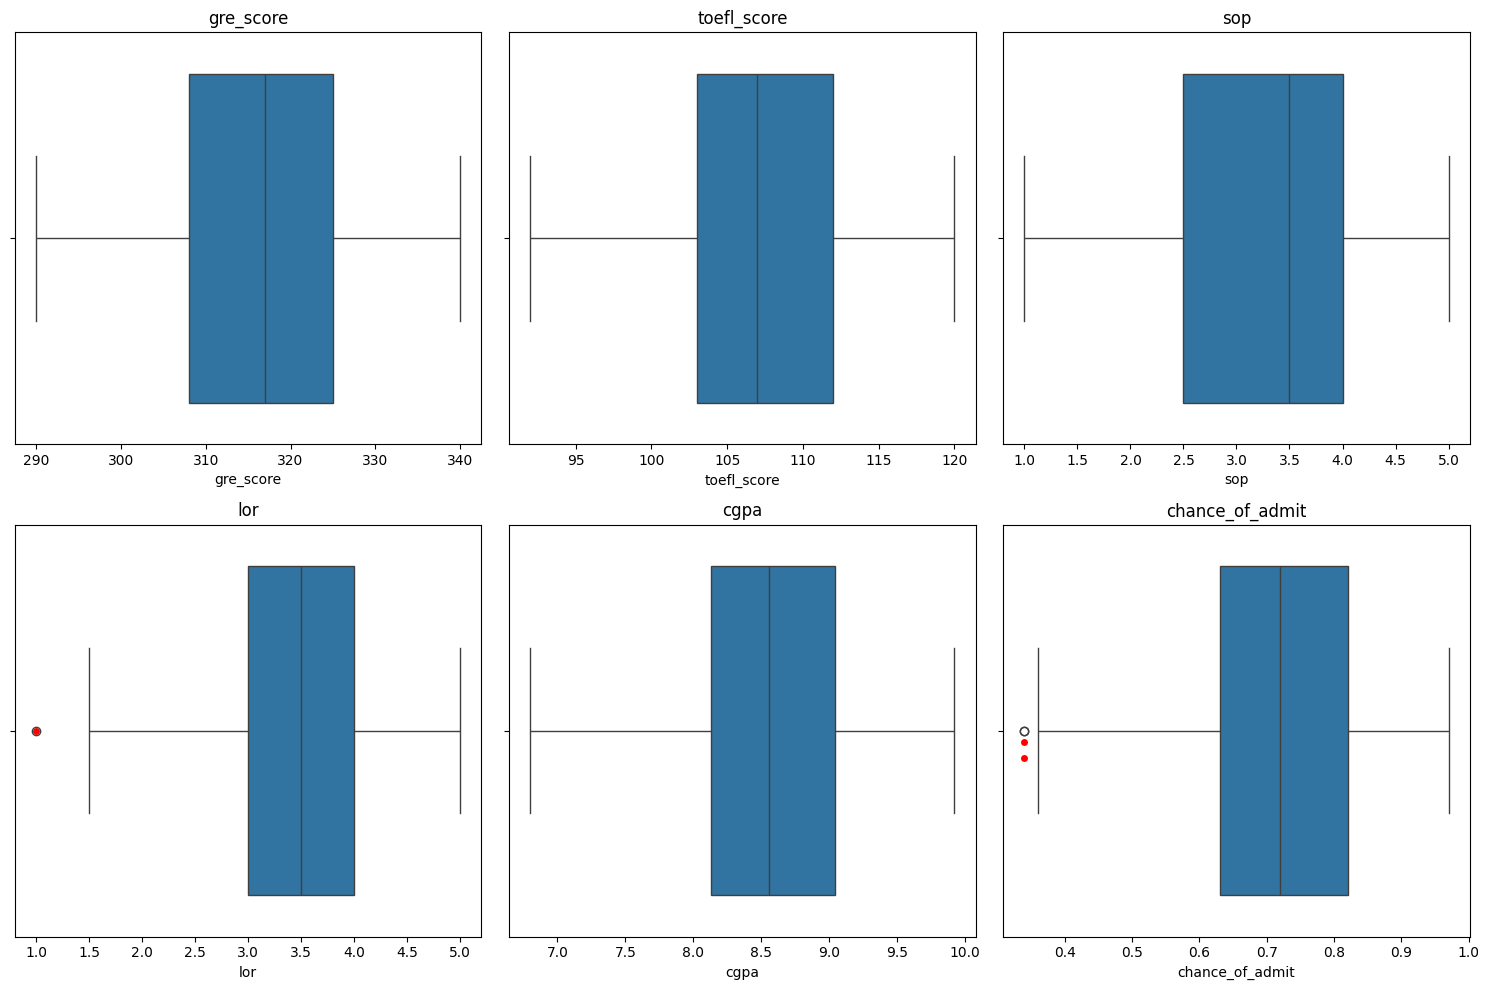

In [13]:
# Set up the matplotlib figure (2x3 grid)
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Plot each KDE plot
sns.boxplot(x = df["gre_score"],ax=axs[0, 0], fill=True)
sns.stripplot(x = outlier_func(df["gre_score"]), color = "red", ax=axs[0, 0])
axs[0, 0].set_title('gre_score')

sns.boxplot(x = df["toefl_score"],ax=axs[0, 1], fill=True)
sns.stripplot(x = outlier_func(df["toefl_score"]), color = "red", ax=axs[0, 1])
axs[0, 1].set_title('toefl_score')

sns.boxplot(x = df["sop"],ax=axs[0, 2], fill=True)
sns.stripplot(x = outlier_func(df["sop"]), color = "red", ax=axs[0, 2])
axs[0, 2].set_title('sop')

sns.boxplot(x = df["lor"],ax=axs[1, 0], fill=True)
sns.stripplot(x = outlier_func(df["lor"]), color = "red", ax=axs[1, 0])
axs[1, 0].set_title('lor')

sns.boxplot(x = df["cgpa"],ax=axs[1, 1], fill=True)
sns.stripplot(x = outlier_func(df["cgpa"]), color = "red", ax=axs[1, 1])
axs[1, 1].set_title('cgpa')

sns.boxplot(x = df["chance_of_admit"],ax=axs[1, 2], fill=True)
sns.stripplot(x = outlier_func(df["chance_of_admit"]), color = "red", ax=axs[1, 2])
axs[1, 2].set_title('chance_of_admit')

# Adjust layout
plt.tight_layout()
plt.show()

In [14]:
outlier_func(df['lor'])

347    1.0
Name: lor, dtype: float64

In [15]:
outlier_func(df['chance_of_admit'])

92     0.34
376    0.34
Name: chance_of_admit, dtype: float64

In [16]:
df.iloc[[347,92,376]]

,gre_score,toefl_score,university_rating,sop,lor,cgpa,research,chance_of_admit
347,299,94,1,1.0,1.0,7.34,0.0,0.42
92,298,98,2,4.0,3.0,8.03,0.0,0.34
376,297,96,2,2.5,2.0,7.43,0.0,0.34


### We see that the outliers are not too extreme from the data and they give a valid representation of the reality rather than a mistake. So instead of imputing or removing them we will continue to use this for training as this will train the model to accurately understand reality.

## Checking for Duplicate rows.

In [24]:
df.duplicated().sum()
# There are no duplicate rows in the dataframe.

0

## Data Preprocessing - Normalisation!

In [134]:
from sklearn.preprocessing import StandardScaler

In [135]:
scaler = StandardScaler()
data = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)

In [136]:
data

,gre_score,toefl_score,university_rating,sop,lor,cgpa,research,chance_of_admit
0,1.819238,1.778865,0.775582,1.137360,1.098944,1.776806,0.886405,1.406107
1,0.667148,-0.031601,0.775582,0.632315,1.098944,0.485859,0.886405,0.271349
2,-0.041830,-0.525364,-0.099793,-0.377773,0.017306,-0.954043,0.886405,-0.012340
3,0.489904,0.462163,-0.099793,0.127271,-1.064332,0.154847,0.886405,0.555039
4,-0.219074,-0.689952,-0.975168,-1.387862,-0.523513,-0.606480,-1.128152,-0.508797
...,...,...,...,...,...,...,...,...
495,1.376126,0.132987,1.650957,1.137360,0.558125,0.734118,0.886405,1.051495
496,1.819238,1.614278,1.650957,1.642404,1.639763,2.140919,0.886405,1.689797
497,1.198882,2.108041,1.650957,1.137360,1.639763,1.627851,0.886405,1.477030
498,-0.396319,-0.689952,0.775582,0.632315,1.639763,-0.242367,-1.128152,0.058582


## Splitting train and test data

In [137]:
X = data.iloc[:,0:7]
Y = data.iloc[:, 7]

In [193]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
xtrain,xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.2, random_state = 24)

## Training the Model

In [175]:
lr = LinearRegression()
lr_ridge = Ridge(alpha = 1)
lr_lasso = Lasso(alpha = 0.1)

In [177]:
lr.fit(xtrain, ytrain)
lr_ridge.fit(xtrain, ytrain)
lr_lasso.fit(xtrain, ytrain)

Lasso(alpha=0.1)

In [180]:
y_pred_lr = lr.predict(xtest)
y_pred_ridge = lr_ridge.predict(xtest)
y_pred_lasso = lr_lasso.predict(xtest)

In [181]:
def adj_r2(xtest, ytest, model):
    y_pred = model.predict(xtest)
    r_squared = r2_score(ytest, y_pred)

    # Calculate Adjusted R^2
    n = xtest.shape[0]  # Number of observations
    p = xtest.shape[1]  # Number of predictors
    adjusted_r_squared = 1 - (1-r_squared) * (n-1) / (n-p-1)
    return adjusted_r_squared
    

## Measuring the performance of the 3 models on both train and test data to see which performs the best.

In [191]:
y_pred_lr_train = lr.predict(xtrain)
y_pred_ridge_train = lr_ridge.predict(xtrain)
y_pred_lasso_train = lr_lasso.predict(xtrain)

In [192]:
print(f'for the ordinary linear regression model: R2 = {r2_score(ytrain, y_pred_lr_train)}, adj R2 = {adj_r2(xtrain, ytrain, lr)},\
MAE = {mean_absolute_error(ytrain,y_pred_lr_train)}, RMSE = {mean_squared_error(ytrain,y_pred_lr_train, squared = False)}')
print(f'for the Ridge linear regression model: R2 = {r2_score(ytrain, y_pred_ridge_train)}, adj R2 = {adj_r2(xtrain, ytrain, lr_ridge)},\
MAE = {mean_absolute_error(ytrain,y_pred_ridge_train)}, RMSE = {mean_squared_error(ytrain,y_pred_ridge_train, squared = False)}')
print(f'for the Lasso linear regression model: R2 = {r2_score(ytrain, y_pred_lasso_train)}, adj R2 = {adj_r2(xtrain, ytrain, lr_lasso)},\
MAE = {mean_absolute_error(ytrain,y_pred_lasso_train)}, RMSE = {mean_squared_error(ytrain,y_pred_lasso_train, squared = False)}')

for the ordinary linear regression model: R2 = 0.8207523447498908, adj R2 = 0.8175514937632817,MAE = 0.3061036544676985, RMSE = 0.432000810069824
for the Ridge linear regression model: R2 = 0.8207470921804201, adj R2 = 0.8175461473979275,MAE = 0.30613095726117917, RMSE = 0.4320071395742188
for the Lasso linear regression model: R2 = 0.8047605761554439, adj R2 = 0.8012741578725054,MAE = 0.3243015914576808, RMSE = 0.4508598666034221


## On test data

In [190]:
print(f'for the ordinary linear regression model: R2 = {r2_score(ytest, y_pred_lr)}, adj R2 = {adj_r2(xtest, ytest, lr)},\
MAE = {mean_absolute_error(ytest,y_pred_lr)}, RMSE = {mean_squared_error(ytest,y_pred_lr, squared = False)}')
print(f'for the Ridge linear regression model: R2 = {r2_score(ytest, y_pred_ridge)}, adj R2 = {adj_r2(xtest, ytest, lr_ridge)},\
MAE = {mean_absolute_error(ytest,y_pred_ridge)}, RMSE = {mean_squared_error(ytest,y_pred_ridge, squared = False)}')
print(f'for the Lasso linear regression model: R2 = {r2_score(ytest, y_pred_lasso)}, adj R2 = {adj_r2(xtest, ytest, lr_lasso)},\
MAE = {mean_absolute_error(ytest,y_pred_lasso)}, RMSE = {mean_squared_error(ytest,y_pred_lasso, squared = False)}')

for the ordinary linear regression model: R2 = 0.8174673275904598, adj R2 = 0.8035789720810382,MAE = 0.30574431767995014, RMSE = 0.3865384454640839
for the Ridge linear regression model: R2 = 0.8177719029488089, adj R2 = 0.8039067216514356,MAE = 0.3055319900531937, RMSE = 0.386215820379144
for the Lasso linear regression model: R2 = 0.8210010310873886, adj R2 = 0.8073815443222987,MAE = 0.30112038639705535, RMSE = 0.3827786040420496


### From the test results it appears that Lasso regression model performs the best which also has the least MAE.
### Another point to note is there is no big difference between the performance numbers in Test and Train data. This implies the data is not overfitting on the model.

## Building a model using StatsModel and dropping features.

In [44]:
pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 5.8 MB/s eta 0:00:0000:010:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 4.1 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [45]:
import statsmodels.api as sm

In [154]:
new_xtrain = sm.add_constant(xtrain)

In [155]:
model = sm.OLS(ytrain, new_xtrain)

In [156]:
results = model.fit()

In [157]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        chance_of_admit   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     256.4
Date:                Thu, 22 Feb 2024   Prob (F-statistic):          4.81e-142
Time:                        13:08:51   Log-Likelihood:                -231.84
No. Observations:                 400   AIC:                             479.7
Df Residuals:                     392   BIC:                             511.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0131      0.02

### The P value shown here is the probability where:
### Null Hypothesis: A particular feature is insignificant.
### Alternate Hypothesis: A particular feature is significant.
### is p<0.05 then we reject null hypthesis and if p>0.05 then we accept the null hypothesis.

### The R-square value comes out to be 0.821 whereas adjusted R-square is 0.818. Therefore we can confidently say that there exits some unnecessary features. The insignificant feature as shown by the P value seems to be const, university_rating and SOP. Let us try to remove them one by one and see how it affects R-square.

## Since the P value of SOP is very high - which means that sop column might be insignificant. So let us drop the column and see how it affects the performance.

In [162]:
xtrain,xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.2, random_state = 24)
new_xtrain = sm.add_constant(xtrain)
new_xtrain = xtrain.drop('sop', axis = 1)
model = sm.OLS(ytrain, new_xtrain)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:        chance_of_admit   R-squared (uncentered):                   0.821
Model:                            OLS   Adj. R-squared (uncentered):              0.818
Method:                 Least Squares   F-statistic:                              300.3
Date:                Thu, 22 Feb 2024   Prob (F-statistic):                   1.41e-143
Time:                        14:12:38   Log-Likelihood:                         -232.23
No. Observations:                 400   AIC:                                      476.5
Df Residuals:                     394   BIC:                                      500.4
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

### The R-square value hasn't changed a bit. Even the P values of every column is <0.05. Let us see how it performs on the test data.

In [159]:
ypred = results.predict(xtest.drop('sop', axis = 1))
r2_score(ytest, ypred)

0.8204204090679413

### It is performing well on test data aswell!

## Checking VIF score to see if there is any multi-colinearity

In [74]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [160]:
vif = pd.DataFrame()
vif["Features"] = new_xtrain.columns
vif["VIF Scores"] = [variance_inflation_factor(new_xtrain.values, i) for i in range(new_xtrain.shape[1])]

In [161]:
print(vif)

            Features  VIF Scores
0          gre_score    4.508103
1        toefl_score    3.917250
2  university_rating    2.195041
3                lor    1.833988
4               cgpa    4.822205
5           research    1.486803


### VIF score are not more than 5, so they look good.

## Let us do the same for the column toefl_score because it had the highest P value even though p<0.05. This is because I observed adjusted R-square id < R-square.

In [163]:
xtrain,xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.2, random_state = 24)
#new_xtrain = sm.add_constant(xtrain)
new_xtrain = xtrain.drop(['sop', 'toefl_score'], axis = 1)
model = sm.OLS(ytrain, new_xtrain)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:        chance_of_admit   R-squared (uncentered):                   0.819
Model:                            OLS   Adj. R-squared (uncentered):              0.816
Method:                 Least Squares   F-statistic:                              356.3
Date:                Thu, 22 Feb 2024   Prob (F-statistic):                   6.43e-144
Time:                        14:13:52   Log-Likelihood:                         -234.47
No. Observations:                 400   AIC:                                      478.9
Df Residuals:                     395   BIC:                                      498.9
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [164]:
ypred = results.predict(xtest.drop(['sop', 'toefl_score'], axis = 1))
r2_score(ytest, ypred)

0.8087200845968682

In [165]:
vif = pd.DataFrame()
vif["Features"] = new_xtrain.columns
vif["VIF Scores"] = [variance_inflation_factor(new_xtrain.values, i) for i in range(new_xtrain.shape[1])]
print(vif)

            Features  VIF Scores
0          gre_score    3.638022
1  university_rating    2.127098
2                lor    1.833808
3               cgpa    4.322011
4           research    1.480607


### We see that performance doesn't take a big hit when we remove toefl_score and even the vif scores comes within 5.

## Next let us try removing University rating (because it had the highest P value) and see how it affects performance

In [167]:
xtrain,xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.2, random_state = 24)
#new_xtrain = sm.add_constant(xtrain)
new_xtrain = xtrain.drop(['sop', 'toefl_score', 'university_rating'], axis = 1)
model = sm.OLS(ytrain, new_xtrain)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:        chance_of_admit   R-squared (uncentered):                   0.815
Model:                            OLS   Adj. R-squared (uncentered):              0.813
Method:                 Least Squares   F-statistic:                              436.8
Date:                Thu, 22 Feb 2024   Prob (F-statistic):                   1.01e-143
Time:                        14:19:57   Log-Likelihood:                         -238.07
No. Observations:                 400   AIC:                                      484.1
Df Residuals:                     396   BIC:                                      500.1
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [168]:
ypred = results.predict(xtest.drop(['sop', 'toefl_score', 'university_rating'], axis = 1))
r2_score(ytest, ypred)

0.8160542167053592

In [169]:
vif = pd.DataFrame()
vif["Features"] = new_xtrain.columns
vif["VIF Scores"] = [variance_inflation_factor(new_xtrain.values, i) for i in range(new_xtrain.shape[1])]
print(vif)

    Features  VIF Scores
0  gre_score    3.570785
1        lor    1.662386
2       cgpa    4.089269
3   research    1.474777


### Performance on the test data has actually increased! Let us keep doing this for other columns - this time it is 'research'.

In [170]:
xtrain,xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.2, random_state = 24)
#new_xtrain = sm.add_constant(xtrain)
new_xtrain = xtrain.drop(['sop', 'toefl_score', 'university_rating','research'], axis = 1)
model = sm.OLS(ytrain, new_xtrain)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:        chance_of_admit   R-squared (uncentered):                   0.811
Model:                            OLS   Adj. R-squared (uncentered):              0.809
Method:                 Least Squares   F-statistic:                              566.7
Date:                Thu, 22 Feb 2024   Prob (F-statistic):                   4.79e-143
Time:                        14:24:34   Log-Likelihood:                         -242.94
No. Observations:                 400   AIC:                                      491.9
Df Residuals:                     397   BIC:                                      503.9
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [172]:
ypred = results.predict(xtest.drop(['sop', 'toefl_score', 'university_rating', 'research'], axis = 1))
r2_score(ytest, ypred)

0.8090491577766505

In [173]:
vif = pd.DataFrame()
vif["Features"] = new_xtrain.columns
vif["VIF Scores"] = [variance_inflation_factor(new_xtrain.values, i) for i in range(new_xtrain.shape[1])]
print(vif)

    Features  VIF Scores
0  gre_score    3.294998
1        lor    1.657315
2       cgpa    4.069326


### Performance on the test data has not decreased so this model should be the final one as it has only 3 features remaining. And removing columns further will adversely impact the performance.

### Let us check our results with RFE and see what features sklearn selects

In [220]:
from sklearn.feature_selection import RFE

In [226]:
xtrain,xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.2, random_state = 24)

In [222]:
selector = RFE(lr, n_features_to_select=3, step=1)
selector = selector.fit(xtrain, ytrain)

In [224]:
print("Selected features:", selector.support_)
print("Feature ranking:", selector.ranking_)


Selected features: [ True False False False  True  True False]
Feature ranking: [1 2 4 5 1 1 3]


In [225]:
df

,gre_score,toefl_score,university_rating,sop,lor,cgpa,research,chance_of_admit
0,337,118,4,4.5,4.5,9.65,1.0,0.92
1,324,107,4,4.0,4.5,8.87,1.0,0.76
2,316,104,3,3.0,3.5,8.00,1.0,0.72
3,322,110,3,3.5,2.5,8.67,1.0,0.80
4,314,103,2,2.0,3.0,8.21,0.0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1.0,0.87
496,337,117,5,5.0,5.0,9.87,1.0,0.96
497,330,120,5,4.5,5.0,9.56,1.0,0.93
498,312,103,4,4.0,5.0,8.43,0.0,0.73


### Therefore we see that only gre_score, lor and cgpa are being selected by the model just like what I did manually.

## Now lets try building a model using only these three columns and measure their performance.

In [194]:
xtrain = xtrain.drop(['sop', 'toefl_score', 'university_rating','research'], axis = 1)
xtest = xtest.drop(['sop', 'toefl_score', 'university_rating', 'research'], axis = 1)

In [195]:
lr = LinearRegression()
lr_ridge = Ridge(alpha = 1)
lr_lasso = Lasso(alpha = 0.1)

In [196]:
lr.fit(xtrain, ytrain)
lr_ridge.fit(xtrain, ytrain)
lr_lasso.fit(xtrain, ytrain)

Lasso(alpha=0.1)

In [197]:
y_pred_lr = lr.predict(xtest)
y_pred_ridge = lr_ridge.predict(xtest)
y_pred_lasso = lr_lasso.predict(xtest)

In [198]:
y_pred_lr_train = lr.predict(xtrain)
y_pred_ridge_train = lr_ridge.predict(xtrain)
y_pred_lasso_train = lr_lasso.predict(xtrain)

In [199]:
print(f'for the ordinary linear regression model: R2 = {r2_score(ytrain, y_pred_lr_train)}, adj R2 = {adj_r2(xtrain, ytrain, lr)},\
MAE = {mean_absolute_error(ytrain,y_pred_lr_train)}, RMSE = {mean_squared_error(ytrain,y_pred_lr_train, squared = False)}')
print(f'for the Ridge linear regression model: R2 = {r2_score(ytrain, y_pred_ridge_train)}, adj R2 = {adj_r2(xtrain, ytrain, lr_ridge)},\
MAE = {mean_absolute_error(ytrain,y_pred_ridge_train)}, RMSE = {mean_squared_error(ytrain,y_pred_ridge_train, squared = False)}')
print(f'for the Lasso linear regression model: R2 = {r2_score(ytrain, y_pred_lasso_train)}, adj R2 = {adj_r2(xtrain, ytrain, lr_lasso)},\
MAE = {mean_absolute_error(ytrain,y_pred_lasso_train)}, RMSE = {mean_squared_error(ytrain,y_pred_lasso_train, squared = False)}')

for the ordinary linear regression model: R2 = 0.8106532112294966, adj R2 = 0.8092187658600232,MAE = 0.31651955806109433, RMSE = 0.4440039068662178
for the Ridge linear regression model: R2 = 0.8106491851047297, adj R2 = 0.809214709234311,MAE = 0.31652380981088907, RMSE = 0.444008627320246
for the Lasso linear regression model: R2 = 0.7979199785905783, adj R2 = 0.7963890693374767,MAE = 0.3323346300540788, RMSE = 0.45869025035415245


## On test data

In [200]:
print(f'for the ordinary linear regression model: R2 = {r2_score(ytest, y_pred_lr)}, adj R2 = {adj_r2(xtest, ytest, lr)},\
MAE = {mean_absolute_error(ytest,y_pred_lr)}, RMSE = {mean_squared_error(ytest,y_pred_lr, squared = False)}')
print(f'for the Ridge linear regression model: R2 = {r2_score(ytest, y_pred_ridge)}, adj R2 = {adj_r2(xtest, ytest, lr_ridge)},\
MAE = {mean_absolute_error(ytest,y_pred_ridge)}, RMSE = {mean_squared_error(ytest,y_pred_ridge, squared = False)}')
print(f'for the Lasso linear regression model: R2 = {r2_score(ytest, y_pred_lasso)}, adj R2 = {adj_r2(xtest, ytest, lr_lasso)},\
MAE = {mean_absolute_error(ytest,y_pred_lasso)}, RMSE = {mean_squared_error(ytest,y_pred_lasso, squared = False)}')

for the ordinary linear regression model: R2 = 0.8076404299320017, adj R2 = 0.8016291933673767,MAE = 0.3055641506358432, RMSE = 0.3968069667594844
for the Ridge linear regression model: R2 = 0.8080039930757872, adj R2 = 0.8020041178594055,MAE = 0.30528064953628925, RMSE = 0.39643180315742493
for the Lasso linear regression model: R2 = 0.8115794612437004, adj R2 = 0.805691319407566,MAE = 0.3061434771657499, RMSE = 0.3927231569540251


## Let us use sklearn's LassoCV and RidgeCV to do cross validation and pick the best alpha for the best performance.

### Lasso

In [227]:
xtrain,xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.2, random_state = 24)
from sklearn.linear_model import LassoCV
lr_lasso = LassoCV(n_alphas=100, cv=5, random_state=42)
lr_lasso.fit(xtrain, ytrain)
y_pred_lasso = lr_lasso.predict(xtest)
y_pred_lasso_train = lr_lasso.predict(xtrain)

In [229]:
print("Best alpha:", lr_lasso.alpha_)

# Evaluate on test data
test_score = lr_lasso.score(xtest, ytest)
print("Test score (R-squared):", test_score)

Best alpha: 0.005935979513186637
Test score (R-squared): 0.8189572341070348


### Ridge

In [234]:
xtrain,xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.2, random_state = 24)
from sklearn.linear_model import RidgeCV
lr_ridge = RidgeCV(alphas=np.logspace(-10, 2, 100), cv=5)
lr_ridge.fit(xtrain, ytrain)
y_pred_ridge = lr_ridge.predict(xtest)
y_pred_ridge_train = lr_ridge.predict(xtrain)

In [235]:
print("Best alpha:", lr_ridge.alpha_)

# Evaluate on test data
test_score = lr_ridge.score(xtest, ytest)
print("Test score (R-squared):", test_score)

Best alpha: 6.1359072734131885
Test score (R-squared): 0.8190136790559127


# From all the models we tested the best one we got so far is this - Ridge model with alpha as 6.13, which gave a score of 0.819 with only three columns - gre_score, lor and cgpa.

## 1. Mean of residuals

In [243]:
y_pred_ridge = lr_ridge.predict(X)

In [244]:
residuals = y_pred_ridge - Y
np.mean(residuals)

-0.013150102918659094

In [245]:
residuals

0      0.218038
1      0.332502
2     -0.477034
3     -0.417957
4     -0.171539
         ...   
495   -0.179814
496    0.236767
497    0.127279
498   -0.157395
499   -0.106427
Name: chance_of_admit, Length: 500, dtype: float64

## 2. Normality of residuals

<Axes: xlabel='chance_of_admit', ylabel='Density'>

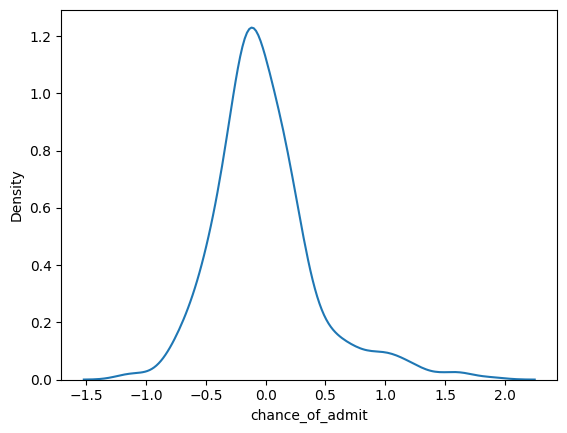

In [246]:
sns.kdeplot(residuals)

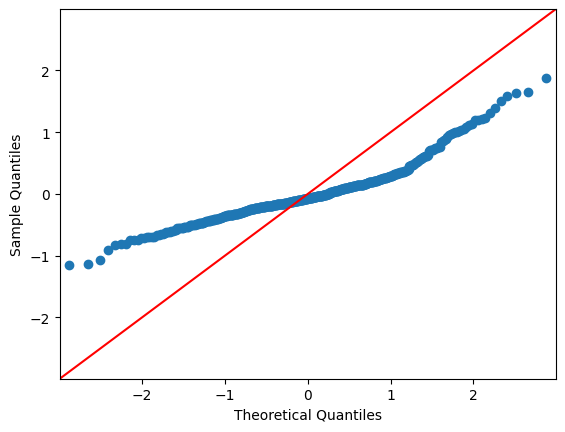

In [247]:
fig = sm.qqplot(residuals, line ='45')
plt.show()

## The QQ plot doesn't seem to confidently tell that residual distribution follow normal graph, however from kde plot above it is visually clear that residuals follow normality.

## 3. Linearity of variables

Text(0, 0.5, 'Actual Y values')

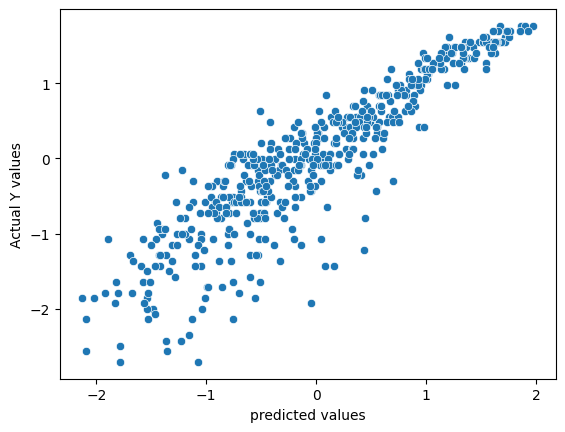

In [250]:
sns.scatterplot(x = y_pred_ridge, y = Y)
plt.xlabel('predicted values')
plt.ylabel('Actual Y values')

## We observe that predicted values and actual values follow a straight line. Which basically means the data follows a linear pattern and Linear Regression is the right model to fit.

# 4. Test for Homoskedasticity

<Axes: xlabel='predicted values', ylabel='Residuals'>

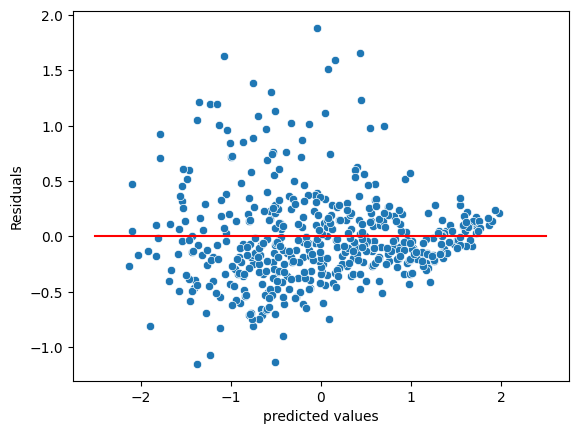

In [256]:
sns.scatterplot(x = y_pred_ridge, y = residuals)
plt.xlabel('predicted values')
plt.ylabel('Residuals')
sns.lineplot(x=[-2.5,2.5], y=[0,0], color='red')

## We observe there is no Homoskedasticity since the residuals don't appear to diverge or converge.

# Business insights and recommendation.

## 1. From our evaluation using RFE and VIF scores we found out that the most important parameters to determine the chances of admission is GRE score, LOR and CGPA. We can suggest our customers/students to focus on this more.
## 2. The other 4 parameters like SOP, university rating, TOEFL score and Research is not too important. We can suggest student to give less priority, but not outright removing it since TOEFL, SOP etc is mandatory to apply.
## 3. I would suggest Jamboree to collect more data, since we only had data for 500 students. Having more data is going to help us train our model better and make better predictions without having to worry about overfitting.
## 4. In one of the models we got R2 on train data as 0.97 whereas on test data it was 0.81. This was significant difference due to overfitting. We further modified the model to prevent overfitting like using Lasso or Ridge Regression.
## 5. Speaking about overfitting, the best Linear regression model comes out to be the Ridge regression model with a small alpha.
## 6. GRE score, TOEFL score and cgpa had a strong correlation with each other since they all measure the aptitude/skills of the candidate. So if a candidate is good at academics, he/she will be definitely good at all these parameters.
## 7. TOEFL, SOP directly measure the communication skills of a candidate in english language, so we saw a strong multicollinearity between such parameters. 
## 8. Research and the least correlation with chances of admission. So we can ask the student to neglect this part as anyways it takes a lot of time and effort to publish a paper. He would be better off utilizing this time to prepare for gre or TOEFl.
## 9. Using our ML model we can predict the chances of admission at 80% to 82% accuracy. If we had more data, we could utilize the rest of the columns (because model won't overfit on large dataset) and increase the accuracy even more so our prediction will be reliable.
## 10. Even with a more data if we find out that some of the columns do not contribute much, then we can just ask the candidate to input 3-4 parameters and give our prediction rather than taking all of the information from candidate. This is going to improve the user experience. 
## 11. If we can collect data regarding the candidate's real admission status for e.g like a survey then we can train our model with more precise data. And we can actually build a classification model since the candidate is going to be either admitted (1) or not admitted (0), rather than our predicted probabilities. 
## 12. If it is possible, we can have objective metrics rather than subjective metrics like SOP score, LOR score. Because the score is given by a human and nobody is perfect, the score will depend on person to person. Therefore if we had like a metric that objectively measures the score (let's say we can ask ChatGPT to give the score) then its more reliable and unbiased.
## 13. If it is possible, we can have objective metrics rather than subjective metrics like SOP score, LOR score. Because the score is given by a human and nobody is perfect, the score will depend on person to person. Therefore if we had like a metric that objectively measures the score (let's say we can ask ChatGPT to give the score) then its more reliable and unbiased.
## 14. I would also suggest Jamboree to give objective metric to Research column. If we have a continuous variable rather than 0 or 1 then the model may utilize this better and this could be a significant paramter just like cgpa, gre score etc. Since we have only 0 and 1 there is no strong correlation with chances of admission.